In [40]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import colorlover as cl
import plotly.io as pio

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial.polynomial import polyfit

sb.set()
%matplotlib inline

In [41]:
df = pd.read_csv("Datasets/train_V2.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [43]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [44]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [45]:
df.corr().abs()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,0.386032,0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,0.010990,0.427857
killPlace,0.290062,0.554844,0.677398,0.555290,0.469829,0.386032,1.000000,0.023278,0.730499,0.810517,...,0.269804,0.236202,0.057356,0.089396,0.037797,0.073569,0.590236,0.490144,0.002415,0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,0.002585,0.023278,1.000000,0.036192,0.037091,...,0.012041,0.029316,0.004156,0.004604,0.039739,0.009658,0.004630,0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,0.730499,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,0.810517,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial.polynomial import polyfit

columns = ['boosts', 'killPlace','walkDistance', 'weaponsAcquired', 'damageDealt', 'heals', 'kills']

X = df[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives', 'rideDistance', 'walkDistance', 'weaponsAcquired']]
y = df['winPlacePerc']
split_size = 0.25

X_train, X_test,y_train,y_test= train_test_split(X, y, test_size = split_size)

poly = PolynomialFeatures(degree=2)
linreg = LinearRegression()
linreg.fit(poly.fit_transform(X_train), y_train)
y_pred_train = linreg.predict(poly.fit_transform(X_train))
y_pred_test = linreg.predict(poly.fit_transform(X_test))

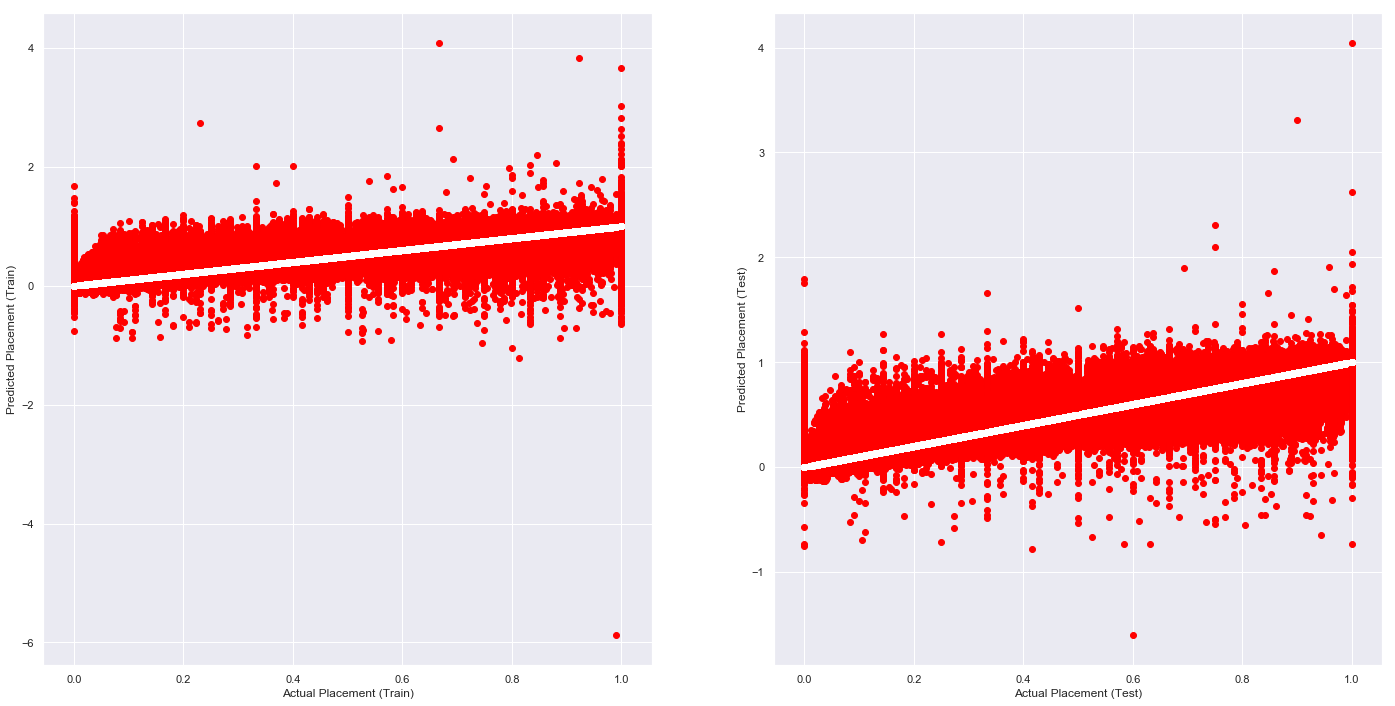

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.867176517023
Mean Squared Error (MSE) 	: 0.0125510121426

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.867323103328
Mean Squared Error (MSE) 	: 0.0125392177577


In [47]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_pred_train, color='red')
axes[0].scatter(y_train, y_train, color='white')
axes[0].set_xlabel("Actual Placement (Train)")
axes[0].set_ylabel("Predicted Placement (Train)")
axes[1].scatter(y_test, y_pred_test,color='red')
axes[1].scatter(y_test, y_test,color='white')
axes[1].set_xlabel("Actual Placement (Test)")
axes[1].set_ylabel("Predicted Placement (Test)")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(poly.fit_transform(X_train), y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_pred_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(poly.fit_transform(X_test), y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred_test))

In [50]:
df_test_orig = pd.read_csv("Datasets/test_V2.csv")

df_test = df_test_orig[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives', 'rideDistance', 'walkDistance', 'weaponsAcquired']]

df_pred_test = linreg.predict(poly.fit_transform(df_test))

df_test_orig['winPlacePerc'] = df_pred_test
df_test_orig = df_test_orig[['Id', 'winPlacePerc']]

df_test_orig.head()

,Id,winPlacePerc
0,9329eb41e215eb,0.304084
1,639bd0dcd7bda8,0.868036
2,63d5c8ef8dfe91,0.598199
3,cf5b81422591d1,0.629374
4,ee6a295187ba21,0.950364


In [53]:
df_test_orig.to_csv('Datasets/submission.csv', index = False)